<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="500" height="auto" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>Chair of Soil Mechanics and Foundation Engineering<br>Geotechnical Institute<br>Technische Universität Bergakademie Freiberg.</p>
        <p><a href="https://tu-freiberg.de/en/soilmechanics">https://tu-freiberg.de/en/soilmechanics</a></p>
    </div>
</div>

# Erddruckberechnung -- Spundwand

Das folgende Beispiel ist an das Beispiel aus W. Fellin "Geotechnik -- Lernen mit Beispielen" angelehnt.

![Rankine.png](https://raw.githubusercontent.com/nagelt/Teaching_Scripts/master/Images/Spundwand.png)

**Aufgabe:** Zu untersuchen sind die Verteilungen von Erd- und Wasserdrücken im Falle des Niedrigwassers, für den davon ausgegangen wird, dass sich aufgrund der sich einstellenden Wandverschiebung auf der Bodenseite der aktive Erddruck einstellt und auf der Wasserseite der Erdwiderstand aktiviert wird.

Den Wandreibungswinkel legen wir zu $\delta_\text{a} = 2/3\,\varphi$ fest. Auf der passiven Seite wird zunächst $\delta_\text{p} = -\varphi/3$ angesetzt und diese Wahl später über das vertikale Kräftegleichgewicht überprüft.

Sei außerdem $p_\text{v} = 10\,$kN/m².

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#Some plot settings
import plot_functions.plot_settings

Die aktiven und passiven Erddrücke in horizontaler Richtung ergeben sich zu 

\begin{align}
    e_\text{ah} &= \gamma z K_\text{agh} + p_\text{v} K_\text{aph} - c K_\text{ach}
    \\
    e_\text{ph} &= \gamma z K_\text{pgh} + p_\text{v} K_\text{pph} + c K_\text{pch}
\end{align}

Betrachten wir zunächst die aktive Seite mit den Eddruckbeiwerten:

\begin{align*}
	K_\text{agh} &= \left[
	\frac{\cos(\varphi - \alpha)}{\cos \alpha \left( 1 + \sqrt{\displaystyle\frac{\sin(\varphi + \delta_\text{a}) \sin (\varphi - \beta)}{\cos(\alpha - \beta) \cos(\alpha + \delta_\text{a})}} \right)}
	\right]^2
	\qquad
	K_\text{ag} = \frac{K_\text{agh}}{\cos (\alpha + \delta_\text{a})} 
    \qquad
    K_\text{agv} = K_\text{agh} \tan (\alpha + \delta_\text{a})
    \\
    K_\text{aph} &= \frac{\cos \alpha \cos \beta}{\cos(\alpha - \beta)} K_\text{agh}
    \\
    K_\text{ach} &= \frac{2\cos(\alpha - \beta) \cos\varphi \cos(\alpha+\delta_\text{a})}{\left[ 1 + \sin(\varphi + \alpha + \delta_\text{a} - \beta)\right]\cos\alpha}
\end{align*}

Dabei ergeben sich die Überlegungen zu $K_\text{agv}$ bzw. $K_\text{ag}$ aus den Betrachtungen des Zusammenspiels von $e_\text{agh}$ mit $e_\text{agv}$ und $e_\text{ag}$.

In [2]:
K_agh = lambda alpha,beta,delta,phi: (np.cos(phi - alpha)/(np.cos(alpha) * 
                                                           (1 + np.sqrt(np.sin(phi+delta)*np.sin(phi-beta)/
                                                                        (np.cos(alpha+delta)*np.cos(alpha-beta))))))**2

K_aph = lambda Kagh,alpha,beta: np.cos(alpha)*np.cos(beta)/np.cos(alpha-beta)*Kagh

K_ach = lambda alpha,beta,delta,phi: 2*np.cos(alpha-beta)*np.cos(phi)*np.cos(alpha+delta)/(np.cos(alpha)*(1+np.sin(phi+alpha+delta-beta)))

h_in_v = lambda h,alpha,delta: h*np.tan(alpha+delta)
h_in_t = lambda h,alpha,delta: h/np.cos(alpha+delta)

In [3]:
phi = np.deg2rad(np.array([34,27]))
delta_a = 2/3*phi
delta_p = -1/3*phi

In [4]:
res_K_agh = np.array([K_agh(0,0,delta_a[0],phi[0]),
                      K_agh(0,0,delta_a[1],phi[1])])
res_K_aph = np.array([K_aph(res_K_agh[0],0,0),
                      K_aph(res_K_agh[1],0,0)])
res_K_ach = K_ach(0,0,delta_a[1],phi[1])


print("K_{agh} = %.3f für Sa und %.3f für saSi" %(res_K_agh[0],res_K_agh[1]))
print("K_{aph} = %.3f für Sa und %.3f für saSi" %(res_K_aph[0],res_K_aph[1]))
print("K_{ach} entfällt für Sa und beträgt %.3f für saSi" %(res_K_ach))

print("\nK_{ag} = %.3f für Sa und %.3f für saSi" %(h_in_t(res_K_agh[0],0,2./3*np.deg2rad(34)),h_in_t(res_K_agh[1],0,2./3*np.deg2rad(27))))
print("K_{ap} = %.3f für Sa und %.3f für saSi" %(h_in_t(res_K_aph[0],0,2./3*np.deg2rad(34)),h_in_t(res_K_aph[1],0,2./3*np.deg2rad(27))))
print("K_{ac} entfällt für Sa und beträgt %.3f für saSi" %h_in_t(res_K_ach,0,2./3*np.deg2rad(27)))

K_{agh} = 0.235 für Sa und 0.318 für saSi
K_{aph} = 0.235 für Sa und 0.318 für saSi
K_{ach} entfällt für Sa und beträgt 0.993 für saSi

K_{ag} = 0.254 für Sa und 0.334 für saSi
K_{ap} = 0.254 für Sa und 0.334 für saSi
K_{ac} entfällt für Sa und beträgt 1.044 für saSi


Auf der passiven Seite nutzen wir:

\begin{align}
    K_\text{pgh} &= \cos(\alpha + \delta_\text{p}) K_\text{pg,0} i_\text{pg} g_\text{pg} t_\text{pg}
    \\
    K_\text{pph} &= \cos(\alpha + \delta_\text{p}) K_\text{pp,0} i_\text{pp} g_\text{pp} t_\text{pp}
    \\
    K_\text{pch} &= \cos(\alpha + \delta_\text{p}) K_\text{pc,0} i_\text{pc} g_\text{pc} t_\text{pc}
    \\
    &\text{mit}
    \\
    K_\text{pg,0} &= K_\text{pp,0} = \frac{1+\sin\varphi}{1-\sin\varphi}
    \\
    K_\text{pc,0} &= 2 \sqrt{K_\text{pg,0}}
\end{align}

Die Beiwerte können nach DIN4085 berechnet werden. Alternativ können die Erddruckbeiwerte aus den im Anhang gegebenen Abbildungen abgelesen werden. Damit ergibt sich ungefähr:

$$
    K_\text{pgh} \approx 3.4 \qquad K_\text{pch} \approx 4.1
$$
Nun rechnen wir die Erddrücke an den Schichtgrenzen aus.

In [5]:
#Schichtdicken:
dza = np.array([0,6,4.5,9])
#maßgebliche Wichten
gamma = np.array([18,18,10,9])
#Vertikale Effektivspannungszuwächse:
d_sigma_v = dza*gamma
#Vertikale Effektivspannungen
sigma_v=d_sigma_v.cumsum()
print("Tiefen unter GOK bergseitig in m:", dza.cumsum())
print("Zugehörige Vertikaleffektivspannungen in kN/m²:", sigma_v)

Tiefen unter GOK bergseitig in m: [ 0.   6.  10.5 19.5]
Zugehörige Vertikaleffektivspannungen in kN/m²: [  0. 108. 153. 234.]


In [6]:
pv = 10.
c = 20.
e_ah_Sa = sigma_v[:3]*res_K_agh[0] + pv*res_K_aph[0]
e_ah_Si = sigma_v[2:]*res_K_agh[1] + pv*res_K_aph[1] - c * res_K_ach
print("Sandschicht: Tiefen unter GOK bergseitig in m:", dza.cumsum()[:3])
print("Sandschicht: Zugehörige horizontale Erddrücke in kN/m²:", e_ah_Sa)
print("Sandschicht: Zugehörige vertikale Erddrücke in kN/m²:", h_in_v(e_ah_Sa,0,delta_a[0]))
print("Schluffschicht: Tiefen unter GOK bergseitig in m:", dza.cumsum()[2:])
print("Schluffschicht: Zugehörige horizontale Erddrücke in kN/m²:", e_ah_Si)
print("Schluffschicht: Zugehörige vertikale Erddrücke in kN/m²:", h_in_v(e_ah_Si,0,delta_a[1]))

Sandschicht: Tiefen unter GOK bergseitig in m: [ 0.   6.  10.5]
Sandschicht: Zugehörige horizontale Erddrücke in kN/m²: [ 2.3462205  27.68540184 38.24339407]
Sandschicht: Zugehörige vertikale Erddrücke in kN/m²: [ 0.97984186 11.56213396 15.97142233]
Schluffschicht: Tiefen unter GOK bergseitig in m: [10.5 19.5]
Schluffschicht: Zugehörige horizontale Erddrücke in kN/m²: [31.91630531 57.64352792]
Schluffschicht: Zugehörige vertikale Erddrücke in kN/m²: [10.37023623 18.72951758]


In [7]:
#Schichtdicken:
dzp = np.array([0,9])
#maßgebliche Wichten
gamma = 9
#Vertikale Effektivspannungszuwächse:
d_sigma_vp = dzp*gamma
#Vertikale Effektivspannungen
sigma_vp=d_sigma_vp.cumsum()
print("Tiefen unter Sohle wasserseitig in m:", dzp.cumsum())
print("Zugehörige Vertikaleffektivspannungen in kN/m²:", sigma_vp)

Tiefen unter Sohle wasserseitig in m: [0 9]
Zugehörige Vertikaleffektivspannungen in kN/m²: [ 0 81]


In [8]:
K_pgh = 3.4
K_pch = 4.1
e_ph_Si = sigma_vp*K_pgh + c * K_pch
print("Schluffschicht: Tiefen unter Sohle wasserseitig in m:", dzp.cumsum())
print("Schluffschicht: Zugehörige horizontale Erddrücke in kN/m²:", e_ph_Si)
print("Schluffschicht: Zugehörige vertikale Erddrücke in kN/m²:", h_in_v(e_ph_Si,0,delta_p[1]))

Schluffschicht: Tiefen unter Sohle wasserseitig in m: [0 9]
Schluffschicht: Zugehörige horizontale Erddrücke in kN/m²: [ 82.  357.4]
Schluffschicht: Zugehörige vertikale Erddrücke in kN/m²: [-12.98752411 -56.60659897]


Wir vernachlässigen vorerst Strömungskräfte und rechnen die hydrostatische Wasserdruckverteilung aus:

In [9]:
z_wa = np.array([6,19.5])
p_wa = 10*(z_wa-6)

z_wp = np.array([7,19.5])
p_wp = 10*(z_wp-7)

Wir können das Ergebnis nun darstellen.

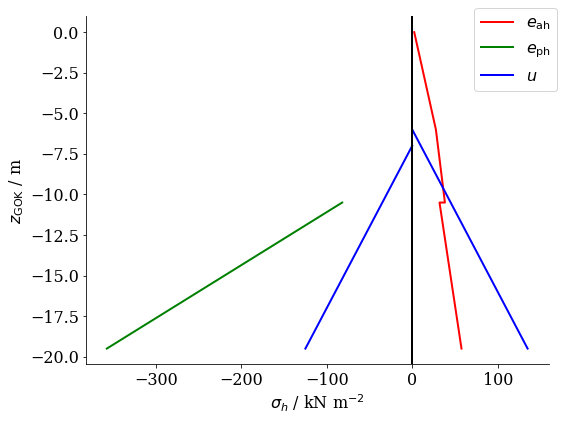

In [10]:
fig, ax = plt.subplots()
ax.plot(np.append(e_ah_Sa,e_ah_Si),-np.append(dza.cumsum()[:3],dza.cumsum()[2:]),label='$e_\\mathrm{ah}$',color='red')
ax.plot(-e_ph_Si,-dzp.cumsum()-10.5,label='$e_\\mathrm{ph}$',color='green')
ax.plot(p_wa,-z_wa,label='$u$',color='blue')
ax.plot(-p_wp,-z_wp,color='blue')
ax.axvline(0)
ax.set_xlabel('$\\sigma_h$ / kN m$^{-2}$')
ax.set_ylabel('$z_\\mathrm{GOK}$ / m')
fig.tight_layout()
fig.legend();

Wir überprüfen nun, ob $\sum V \approx 0$, um die Annahme $\delta_\text{p} = -\varphi/3$ zu verifizieren. 

Dazu berücksichtigen wir auch das Gewicht der Spundwand mit $q_\text{SPW} = 1.06\,\text{kN}\,\text{m}^{-2}$.

In [11]:
q_spw = 1.06 #kN/m²
H_spw = 21 #m
V_spw = q_spw*H_spw
Eav = np.trapz(h_in_v(e_ah_Sa,0,delta_a[0]),x=dza.cumsum()[:3]) + np.trapz(h_in_v(e_ah_Si,0,delta_a[1]),x=dza.cumsum()[2:])
Epv = np.trapz(h_in_v(e_ph_Si,0,delta_p[1]),x=dzp.cumsum())
print("Summe der bergseitigen Vertikalkräfte: %.1f kN/m" %(Eav+V_spw))
print("Summe der wasserseitigen Vertikalkräfte: %.1f kN/m" %(Epv))

Summe der bergseitigen Vertikalkräfte: 252.8 kN/m
Summe der wasserseitigen Vertikalkräfte: -313.2 kN/m


Wir überprüfen außerdem das horizontale Kräftegleichgewicht:

In [12]:
Eah = np.trapz(e_ah_Sa,x=dza.cumsum()[:3]) + np.trapz(e_ah_Si,x=dza.cumsum()[2:])
P_a = np.trapz(p_wa,x=z_wa)
Eph = np.trapz(e_ph_Si,x=dzp.cumsum())
P_p = np.trapz(p_wp,x=z_wp)
print("Summe der bergseitigen Horizontalkräfte: %.1f kN/m" %(Eah+P_a))
print("Summe der wasserseitigen Horizontalkräfte: %.1f kN/m" %(Eph+P_p))

Summe der bergseitigen Horizontalkräfte: 1552.7 kN/m
Summe der wasserseitigen Horizontalkräfte: 2758.6 kN/m


Wiederholen wir die Berechnung mit $\delta_\text{p} = 0°$ ($K_\text{pgh} = 2.8$ und $K_\text{pch} = \text{3.3}$), so erhalten wir:

In [13]:
K_pgh = 2.8
K_pch = 3.3
e_ph_Si = sigma_vp*K_pgh + c * K_pch
print("Schluffschicht: Tiefen unter Sohle wasserseitig in m:", dzp.cumsum())
print("Schluffschicht: Zugehörige horizontale Erddrücke in kN/m²:", e_ph_Si)
print("Schluffschicht: Zugehörige vertikale Erddrücke in kN/m²:", h_in_v(e_ph_Si,0,0))
Eav = np.trapz(h_in_v(e_ah_Sa,0,delta_a[0]),x=dza.cumsum()[:3]) + np.trapz(h_in_v(e_ah_Si,0,delta_a[1]),x=dza.cumsum()[2:])
Epv = np.trapz(h_in_v(e_ph_Si,0,0),x=dzp.cumsum())
print("Summe der bergseitigen Vertikalkräfte: %.1f kN/m" %(Eav+V_spw))
print("Summe der wasserseitigen Vertikalkräfte: %.1f kN/m" %(Epv))
Eah = np.trapz(e_ah_Sa,x=dza.cumsum()[:3]) + np.trapz(e_ah_Si,x=dza.cumsum()[2:])
P_a = np.trapz(p_wa,x=z_wa)
Eph = np.trapz(e_ph_Si,x=dzp.cumsum())
P_p = np.trapz(p_wp,x=z_wp)
print("Summe der bergseitigen Horizontalkräfte: %.1f kN/m" %(Eah+P_a))
print("Summe der wasserseitigen Horizontalkräfte: %.1f kN/m" %(Eph+P_p))

Schluffschicht: Tiefen unter Sohle wasserseitig in m: [0 9]
Schluffschicht: Zugehörige horizontale Erddrücke in kN/m²: [ 66.  292.8]
Schluffschicht: Zugehörige vertikale Erddrücke in kN/m²: [0. 0.]
Summe der bergseitigen Vertikalkräfte: 252.8 kN/m
Summe der wasserseitigen Vertikalkräfte: 0.0 kN/m
Summe der bergseitigen Horizontalkräfte: 1552.7 kN/m
Summe der wasserseitigen Horizontalkräfte: 2395.8 kN/m


## Weiterführende Aufgaben:

* Interpretieren Sie das Ergebnis bzgl. des mobilisierten Erdwiderstands.